# Análise univariada

## Contextualização

A análise univariada corresponde a um processo de análise de dados que consiste em analisar um único
atributo de um conjunto de dados por vez. Dessa forma, cada atributo é analisado individualmente
de acordo com suas próprias características.

## Obtenção de dados

In [1]:
# needed packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# load dataset
df = pd.read_csv("../datasets/processed/nps_dataset_processed.csv")

In [4]:
df.head()

,Market,Survey date,Quarter,NPS
0,PE,2022-05-07,3,10
1,PE,2022-01-27,4,9
2,AL,2022-01-26,4,0
3,MS,2023-03-12,4,10
4,SC,2018-03-23,1,8


### Helpers

In [5]:
# dataset entries
df_entries = df.shape[0]

## Análise exploratória

TIPOS DE VARIÁVEIS:

`Variáveis Quantitativas`: são as características que podem ser medidas em uma escala quantitativa, ou seja, apresentam valores numéricos que fazem sentido. Podem ser contínuas ou discretas.
* `Discretas`: características mensuráveis que podem assumir apenas um número finito ou infinito contável de valores e, assim, somente fazem sentido valores inteiros. Geralmente são o resultado de contagens. Exemplos: número de filhos, número de bactérias por litro de leite, número de cigarros fumados por dia.
* `Contínuas`: características mensuráveis que assumem valores em uma escala contínua (na reta real), para as quais valores fracionais fazem sentido. Usualmente devem ser medidas através de algum instrumento. Exemplos: peso (balança), altura (régua), tempo (relógio), pressão arterial, idade.
---
`Variáveis Qualitativas (ou categóricas)`: são as características que não possuem valores quantitativos, mas, ao contrário, são definidas por várias categorias, ou seja, representam uma classificação dos indivíduos. Podem ser nominais ou ordinais.
* `Nominais`: não existe ordenação dentre as categorias. Exemplos: sexo, cor dos olhos, fumante/não fumante, doente/sadio.
* `Ordinais`: existe uma ordenação entre as categorias. Exemplos: escolaridade (1o, 2o, 3o graus), estágio da doença (inicial, intermediário, terminal), mês de observação (janeiro, fevereiro,..., dezembro).

### Lista dos atributos a serem analisadas e seu tipo de variável

* `Market` - qualitativa categórica nominal
* `Survey date` - qualitativa categórica ordinais
* `Quarter` - qualitativa categórica ordinais
* `NPS` - qualitativa categórica ordinais


### `Market`

#### Q1. Quantos lugares foram abringidos?

In [39]:
market = df['Market'].unique()

print(market)
print(f"Há {len(market)} lugares abrangidos.")

['PE' 'AL' 'MS' 'SC' 'AC' 'RS' 'MG' 'SE' 'GO' 'AM' 'PI' 'PA' 'AP' 'SP'
 'CE' 'TO' 'MT' 'RJ' 'PB' 'ES' 'PR' 'RO' 'MA' 'RN' 'BA' 'RR']
Há 26 lugares abrangidos.


#### Q2. Qual lugar teve maior número de avaliações?

In [46]:
number_of_reviews = df['Market'].value_counts()
number_of_reviews

Market
AM    223
MA    212
MT    210
RO    210
AL    208
AC    208
CE    207
RS    205
AP    205
PI    204
SC    201
SE    199
RJ    196
RR    194
GO    193
BA    190
PR    182
MG    181
PB    181
PE    177
PA    176
TO    174
MS    173
SP    171
RN    167
ES    153
Name: count, dtype: int64

In [50]:
market_with_more_reviews = number_of_reviews.index.values[0]
print(market_with_more_reviews)

AM


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'AM'),
  Text(1, 0, 'MA'),
  Text(2, 0, 'MT'),
  Text(3, 0, 'RO'),
  Text(4, 0, 'AL'),
  Text(5, 0, 'AC'),
  Text(6, 0, 'CE'),
  Text(7, 0, 'RS'),
  Text(8, 0, 'AP'),
  Text(9, 0, 'PI'),
  Text(10, 0, 'SC'),
  Text(11, 0, 'SE'),
  Text(12, 0, 'RJ'),
  Text(13, 0, 'RR'),
  Text(14, 0, 'GO'),
  Text(15, 0, 'BA'),
  Text(16, 0, 'PR'),
  Text(17, 0, 'MG'),
  Text(18, 0, 'PB'),
  Text(19, 0, 'PE'),
  Text(20, 0, 'PA'),
  Text(21, 0, 'TO'),
  Text(22, 0, 'MS'),
  Text(23, 0, 'SP'),
  Text(24, 0, 'RN'),
  Text(25, 0, 'ES')])

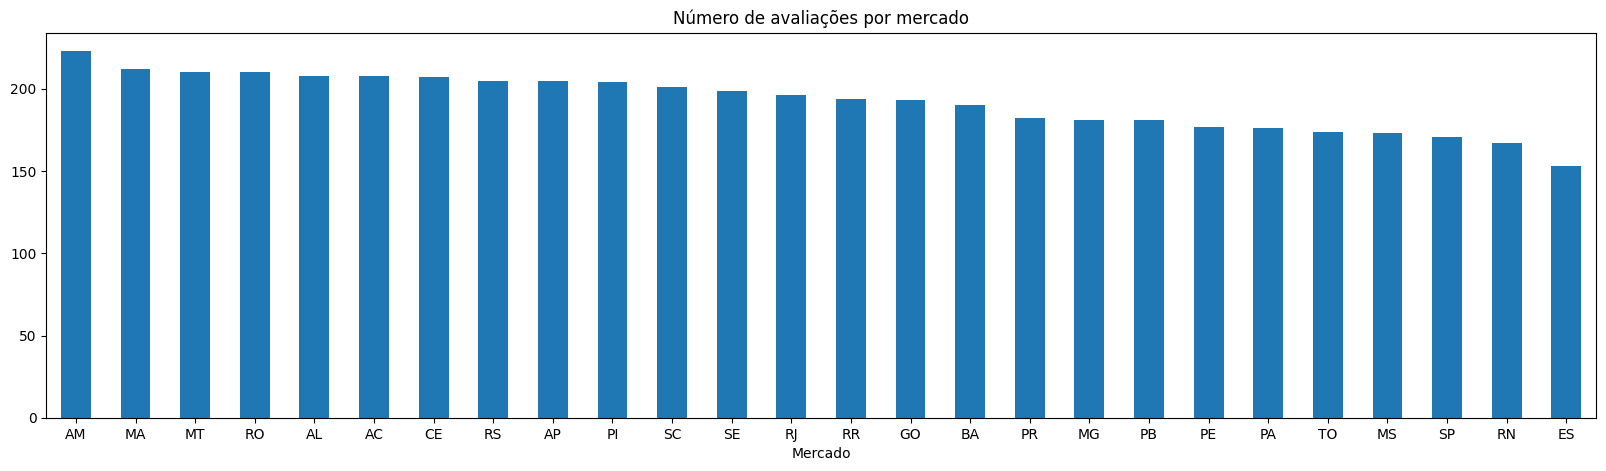

In [51]:
number_of_reviews.plot(
  kind="bar",
  figsize=(20, 5),
  title='Número de avaliações por mercado',
  xlabel='Mercado'
)

plt.xticks(rotation = 0)

In [52]:
print(f"Q1 Resposta = O estado (mercado) com o maior numero de avaliações é {market_with_more_reviews}")

Q1 Resposta = O estado (mercado) com o maior numero de avaliações é AM


#### Q3. Qual lugar teve menor número de avaliações?

In [54]:
number_of_reviews = df['Market'].value_counts().sort_values(ascending=True)
number_of_reviews

Market
ES    153
RN    167
SP    171
MS    173
TO    174
PA    176
PE    177
PB    181
MG    181
PR    182
BA    190
GO    193
RR    194
RJ    196
SE    199
SC    201
PI    204
AP    205
RS    205
CE    207
AC    208
AL    208
RO    210
MT    210
MA    212
AM    223
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'ES'),
  Text(1, 0, 'RN'),
  Text(2, 0, 'SP'),
  Text(3, 0, 'MS'),
  Text(4, 0, 'TO'),
  Text(5, 0, 'PA'),
  Text(6, 0, 'PE'),
  Text(7, 0, 'PB'),
  Text(8, 0, 'MG'),
  Text(9, 0, 'PR'),
  Text(10, 0, 'BA'),
  Text(11, 0, 'GO'),
  Text(12, 0, 'RR'),
  Text(13, 0, 'RJ'),
  Text(14, 0, 'SE'),
  Text(15, 0, 'SC'),
  Text(16, 0, 'PI'),
  Text(17, 0, 'AP'),
  Text(18, 0, 'RS'),
  Text(19, 0, 'CE'),
  Text(20, 0, 'AC'),
  Text(21, 0, 'AL'),
  Text(22, 0, 'RO'),
  Text(23, 0, 'MT'),
  Text(24, 0, 'MA'),
  Text(25, 0, 'AM')])

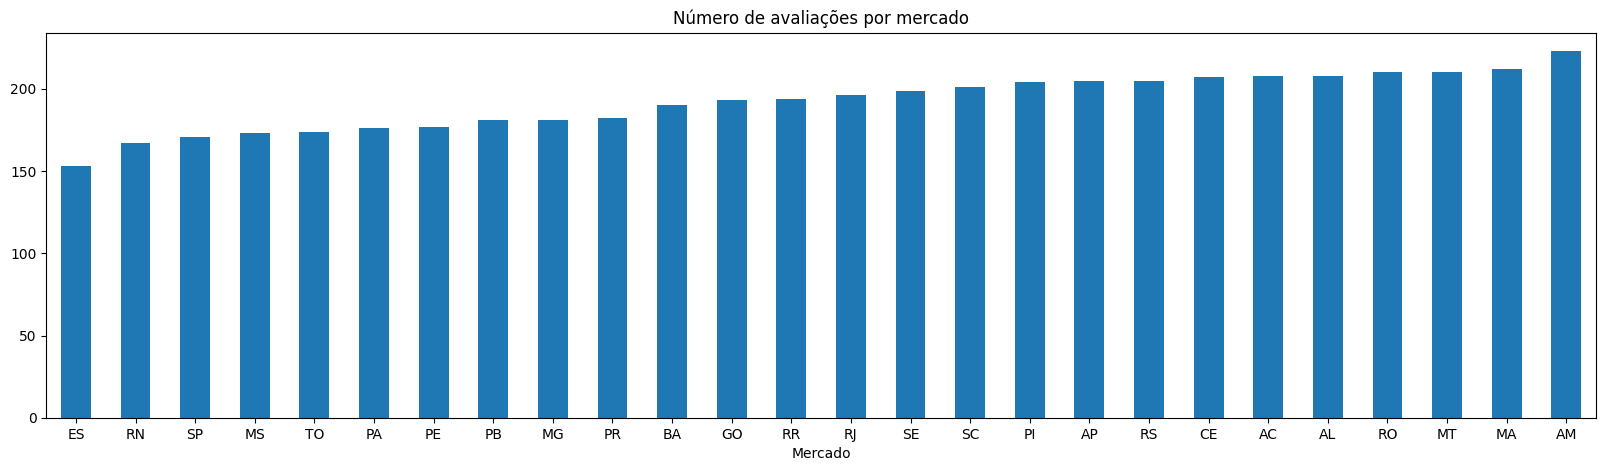

In [105]:
number_of_reviews.plot(
  kind="bar",
  figsize=(20, 5),
  title='Número de avaliações por mercado',
  xlabel='Mercado'
)

plt.xticks(rotation = 0)

In [61]:
market_with_less_reviews = number_of_reviews.index.values[0]
print(f"Q1 Resposta = O estado (mercado) com o menor número de avaliações é {market_with_less_reviews}.")

Q1 Resposta = O estado (mercado) com o menor número de avaliações é ES.


### `Survey date`

#### Q1. Qual ano tem mais avaliações?

In [113]:
get_unique_years = df['Survey date'].str.split('-').str[0].astype(int)
get_unique_years_values = get_unique_years.value_counts()
get_unique_years = get_unique_years_values.index.values[0]

2022

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2022'),
  Text(1, 0, '2020'),
  Text(2, 0, '2021'),
  Text(3, 0, '2023'),
  Text(4, 0, '2018'),
  Text(5, 0, '2019')])

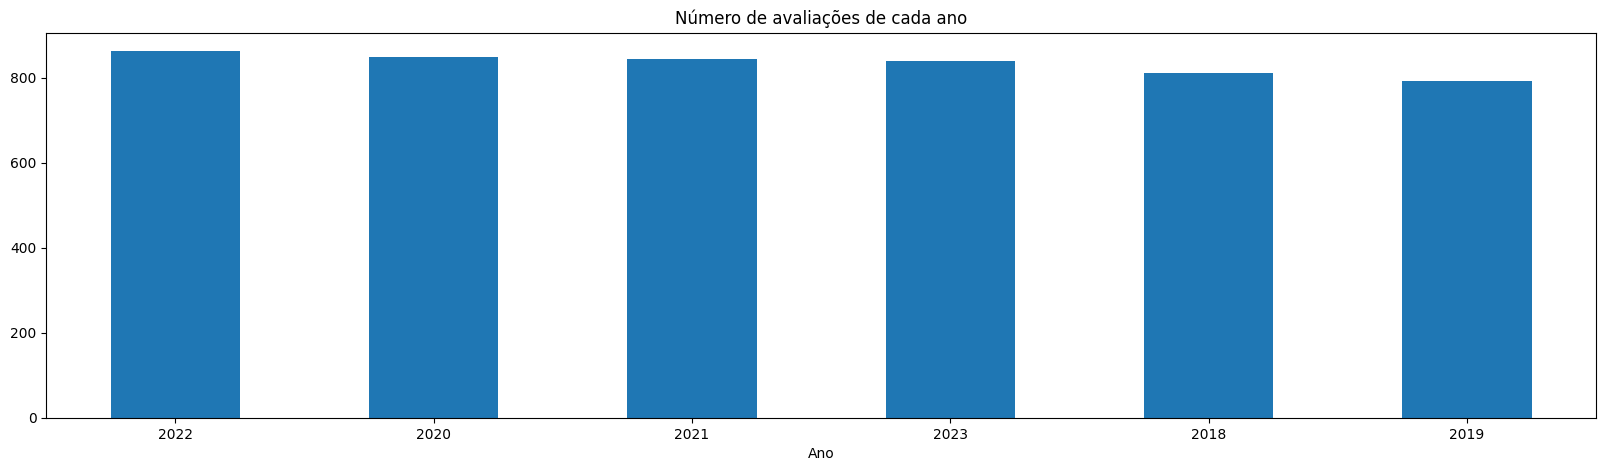

In [112]:
get_unique_years_values.plot(
  kind="bar",
  figsize=(20, 5),
  title='Número de avaliações de cada ano',
  xlabel='Ano'
)

plt.xticks(rotation = 0)

In [114]:
print(f"O ano com mais avaliações é {get_unique_years}.")

O ano com mais avaliações é 2022.


#### Q2. Qual mês tem mais avaliações?

### `Quarter`

#### Q1. Qual trimestre tem mais avaliações?

#### Q2. Qual trimestre tem o melhor score?

#### Q3. Qual trimestre tem o pior score?

### `NPS`

#### Q1. Qual a média das avaliações?

#### Q2. Qual avaliação tem a maior aparição?

#### Q3. Quantidade de aparição de cada score

## Conclusão

Após a preparação do dataset, foi possível responder todas as perguntas elaboradas.